In [1]:
import pandas as pd
import lifelines as ll
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TENURES = pd.read_csv('tenures-summarized-classified.csv')

In [3]:
TENURES.head()

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_censor,ending
0,kruger|01|03|ATL,L. Kruger,ATL,3,190,69,121,2001,2003,True,fired
1,stotts|03|04|ATL,T. Stotts,ATL,2,137,52,85,2003,2004,False,fired
2,woodson|05|10|ATL,M. Woodson,ATL,6,492,206,286,2005,2010,False,fired
3,drew|11|13|ATL,L. Drew,ATL,3,230,128,102,2011,2013,False,fired
4,budenholzer|14|16|ATL,M. Budenholzer,ATL,3,246,146,100,2014,2016,False,current


In [4]:
TENURES.ending.value_counts()

fired               112
interim only         39
resigned             26
current              20
contract expired      2
traded                2
retired               2
mutual                2
died                  1
Name: ending, dtype: int64

In [5]:
tenures = TENURES[TENURES.ending != 'interim only']

In [6]:
death_event = ['fired', 'contract expired', 'mutual']

In [7]:
tenures['death'] = (tenures.ending.isin(death_event) * 1)

/home/ryan/.virtualenvs/coaching-survival/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
tenures.sample(5)

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_censor,ending,death
202,jordan|04|09|WAS,E. Jordan,WAS,6,421,197,224,2004,2009,False,fired,1
4,budenholzer|14|16|ATL,M. Budenholzer,ATL,3,246,146,100,2014,2016,False,current,0
139,gundy|08|12|ORL,S. Van Gundy,ORL,5,394,259,135,2008,2012,False,fired,1
93,porter|04|05|MIL,T. Porter,MIL,2,164,71,93,2004,2005,False,fired,1
124,gundy|01|02|NYK,J. Van Gundy,NYK,2,101,58,43,2001,2002,True,resigned,0


In [9]:
kmf = ll.KaplanMeierFitter()

In [10]:
kmf.fit(tenures.games, event_observed=tenures.death)

<lifelines.KaplanMeierFitter: fitted with 167 observations, 51 censored>

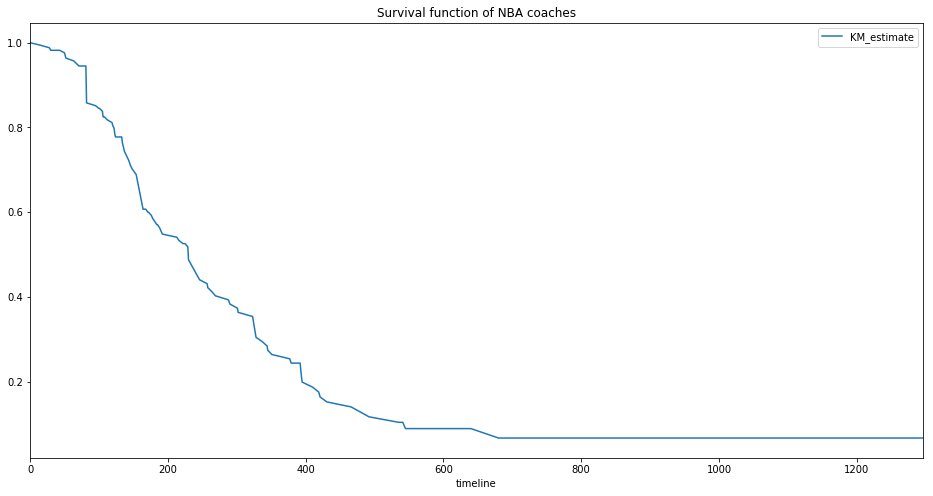

In [11]:
kmf.survival_function_.plot(figsize=(16,8))
plt.title('Survival function of NBA coaches');

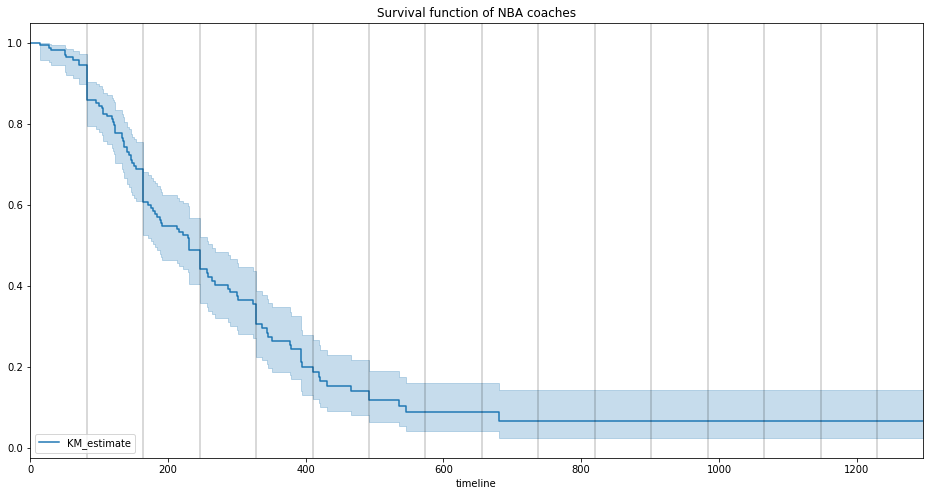

In [12]:
kmf.plot(figsize=(16,8))
[plt.axvline(g, c='black', alpha=0.2) for g in range(82, 82*20, 82)]
plt.title('Survival function of NBA coaches')

In [13]:
POC = pd.read_csv('coach-list-poc.csv')

In [14]:
POC.head()

,coach,teams,poc,note
0,P. Riley,MIA,no,NaN
1,Q. Snyder,UTA,no,NaN
2,K. McHale,HOU|MIN,no,NaN
3,D. Issel,DEN,no,NaN
4,M. D'Antoni,LAL|NYK|PHO,no,NaN


In [15]:
tenures_poc = pd.merge(tenures, POC[['coach','poc']], how='left')

In [17]:
tenures_poc.poc.isnull().sum()

0

In [18]:
tenures_poc.head()

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_censor,ending,death,poc
0,kruger|01|03|ATL,L. Kruger,ATL,3,190,69,121,2001,2003,True,fired,1,no
1,stotts|03|04|ATL,T. Stotts,ATL,2,137,52,85,2003,2004,False,fired,1,no
2,woodson|05|10|ATL,M. Woodson,ATL,6,492,206,286,2005,2010,False,fired,1,yes
3,drew|11|13|ATL,L. Drew,ATL,3,230,128,102,2011,2013,False,fired,1,yes
4,budenholzer|14|16|ATL,M. Budenholzer,ATL,3,246,146,100,2014,2016,False,current,0,no


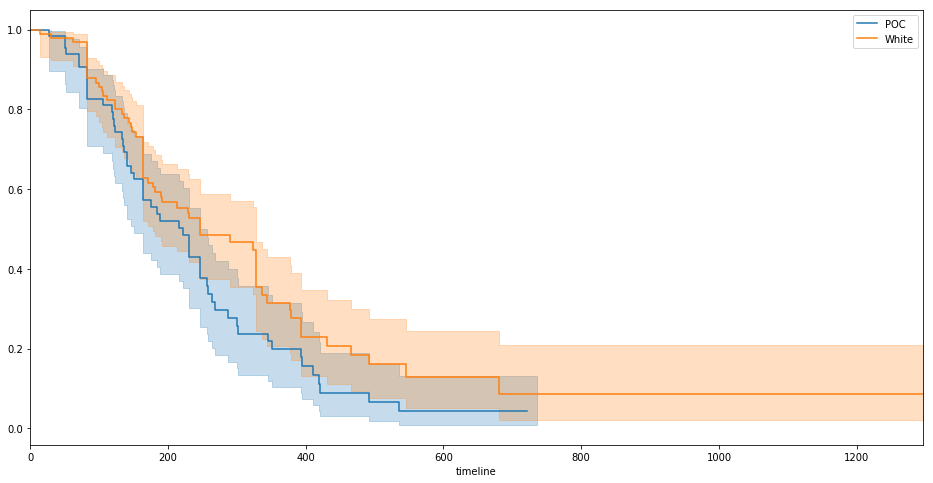

In [24]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

ispoc = (tenures_poc['poc'] == 'yes')

kmf.fit(tenures_poc[ispoc].games, event_observed=tenures_poc[ispoc].death, label="POC")
kmf.plot(ax=ax)
kmf.fit(tenures_poc[~ispoc].games, event_observed=tenures_poc[~ispoc].death, label="White")
kmf.plot(ax=ax)

In [25]:
from lifelines.datasets import load_rossi
rossi_dataset = load_rossi()

In [26]:
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
5,52,0,0,24,1,1,0,0,2
6,23,1,0,25,1,1,1,1,0
7,52,0,1,21,1,1,0,1,4
8,52,0,0,22,1,0,0,0,6
9,52,0,0,20,1,1,0,0,0
